# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 28, 2022 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 18 | 22 |
| **Actual no disease**       | 10 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 23 | 17 |
| **Actual no disease**       | 20 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

Predicting "disease" is likely the "positive" class. This is because this is likely what we want to measure within our data.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = (18 + 100) / (18 + 100 + 22 + 10)
results_dict["B"]["accuracy"] = (23 + 90) / (23 + 90 + 17 + 20)

In [4]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [5]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [6]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

I would pick model A for having the higher accuracy.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [7]:
results_dict["A"]["precision"] = (18) / (18 + 10)
results_dict["B"]["precision"] = (23) / (23 + 20)
results_dict["A"]["recall"] = (18) / (18 + 22)
results_dict["B"]["recall"] = (23) / (23 + 17)
results_dict["A"]["f1"] = 2*((results_dict["A"]["recall"] * results_dict["A"]["precision"]) / (results_dict["A"]["recall"] + results_dict["A"]["precision"]))
results_dict["B"]["f1"] = 2*((results_dict["B"]["recall"] * results_dict["B"]["precision"]) / (results_dict["B"]["recall"] + results_dict["B"]["precision"]))




In [8]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [9]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [10]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [14]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333
precision,0.642857,0.534884
recall,0.450000,0.575000
f1,0.529412,0.554217


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1) Recall is the most informative because false negatives is far more of a problem than false positives, since want don't want to miss people who might have a disease. Recall measures whether we successfully detected disease in the dataset.
2) I would pick model B for having the higher recall score.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

1)https://www.kaggle.com/uciml/sms-spam-collection-dataset (SMS Spam Detection - there is class imbalance as an overwhelming majority of 87% of examples are ham compared to 13% of spam). Precision is the most appropriate metric (assuming positive class is spam examples) as we don't want non-spam emails to be classified as spam.

2)https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction (Predicting Company Bankruptcy - there is class imbalance as an overwhelming majority of 97% of examples are predicted as not bankrupt while only 3% are bankrupt). The most appropriate metric here would be the f1 score, as we can use it identify an adequate balance between recall and precision score.

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [15]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [16]:
stayed_vals = train_df.query("churn == False");
left_vals = train_df.query("churn == True");

print("Amount of people who stayed: " + str(len(stayed_vals)))
print("Amount of people who left: " + str(len(left_vals)))

Amount of people who stayed: 1984
Amount of people who left: 349


Yes, there is class imbalance, as there are 1984 examples of people who stayed while only 349 examples of people who left, that means only 15% of examples are churned while 85% is not churned.

Yes, we should deal with it, because our positive class is the people who left, and thus we are more interested in predicting why people are leaving. But if we keep the distribution of values as is, we will create a machine learning model that is very good at classifying people who stayed as they likely encompass the majority of values in this dataset, while being very poor at predicting people who leave. However, our accuracy score will still be high since there are MUCH more correct predictions of people who stayed. Thus, we should modify class_weight parameters in the model and rely on other metrics such as recall, precision, f1-score, etcetera for a more robust model with unseen data predictions.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [17]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [18]:
# print(X_train.info())
# print(X_train.describe())
# print(X_train.nunique())

# These numeric columns are being scaled with StandardScaler() because they differ in magnitude amongst each other
numeric_cols = [
                "account length", 
                "number vmail messages",
                "total day minutes",
                "total day calls",
                "total day charge",
                "total eve minutes",
                "total eve calls",
               "total eve charge",
               "total night minutes",
               "total night calls",
               "total night charge",
               "total intl minutes",
               "total intl calls",
               "total intl charge",
               "customer service calls",
               ]

# These category columns are being transformed by one-hot-encoding because they contain a set number of possible values even if they have numeric values. In the dataset, there are a total of 51 states and 3 area codes.
ohe_categ_cols = ["state", "area code",]

# These category columns are being transformed by one-hot-encoding with drop="if_binary", because these are categorical values with binary values ("Yes/No").
ohe_categ_binary_cols = ["international plan", "voice mail plan",]

# phone number is being dropped because it likely has no correlation to whether a customer churns or not.
drop_cols = ["phone number"]


preprocessor = make_column_transformer(
    (StandardScaler(), numeric_cols),
    (OneHotEncoder(sparse=False, handle_unknown="ignore"), ohe_categ_cols),
    (OneHotEncoder(drop="if_binary"), ohe_categ_binary_cols),
    ("drop", drop_cols),
)


numeric_cols: These numeric columns are being scaled with StandardScaler() because they differ in magnitude amongst each other

ohe_categ_cols: These category columns are being transformed by one-hot-encoding because they contain a set number of possible values even if they have numeric values. In the dataset, there are a total of 51 states and 3 area codes.

ohe_categ_binary_cols: These category columns are being transformed by one-hot-encoding with drop="if_binary", because these are categorical values with binary values ("Yes/No").

drop _cols: phone number is being dropped because it likely has no correlation to whether a customer churns or not.


<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [19]:
X_train_pp = preprocessor.fit(X_train, y_train)
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'onehotencoder-2': OneHotEncoder(drop='if_binary'),
 'drop': 'drop'}

In [20]:
ohe_columns = list(
    preprocessor.named_transformers_["onehotencoder-1"]
    .get_feature_names_out(ohe_categ_cols)
)

ohe_columns_binary = list(
    preprocessor.named_transformers_["onehotencoder-2"]
    .get_feature_names_out(ohe_categ_binary_cols)
)

new_columns = numeric_cols + ohe_columns + ohe_columns_binary



In [21]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_yes,voice mail plan_yes
1402,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1483,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2638,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

1) We want to use one-hot-encoding because there are only 3 distinct numerical values and each value can thus be represented as a category that other examples are either one of. The number itself holds no significant meaning, just the grouping - therefore categorical classification is more meaningful than numerical. 

2) 408, 415, 510

3) area code_408, area code_415, area code_510

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [22]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]


dummy = DummyClassifier()
pipe_dummy = make_pipeline(preprocessor, dummy)
pd.DataFrame(cross_validate(pipe_dummy, X_train, y_train, cv=5, return_train_score=True, scoring=scoring))

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_cl

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.007553,0.006665,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
1,0.006495,0.004713,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006697,0.004890,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006397,0.006388,0.851931,0.850027,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006598,0.004661,0.849785,0.850562,0.0,0.0,0.0,0.0,0.0,0.0


Get an f1 score, recall, and precision score of 0. Since, dummy classifier predicts most common value for everything. We are getting error because precision equation is TP/(TP + FP), but dummy classifier is classifying every example as False/Negative. Therefore, TP = 0 and FP = 0 which results in an error because division by zero is mathematically not allowed.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [23]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

lr = LogisticRegression()
pipe_lr = make_pipeline(preprocessor, lr)

pd.DataFrame(cross_validate(pipe_lr, X_train, y_train, cv=5, return_train_score=True, scoring=scoring))

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.041836,0.005410,0.869379,0.864416,0.371134,0.332454,0.257143,0.225806,0.666667,0.630000
1,0.036198,0.005045,0.852248,0.868167,0.273684,0.362694,0.185714,0.250896,0.520000,0.654206
2,0.036436,0.005259,0.850107,0.867095,0.255319,0.364103,0.171429,0.254480,0.500000,0.639640
3,0.037011,0.005249,0.869099,0.863953,0.371134,0.345361,0.260870,0.239286,0.642857,0.620370
4,0.031771,0.004970,0.839056,0.868773,0.242424,0.373402,0.171429,0.261649,0.413793,0.651786


No, I am not satisfied the results. More importantly, the recall score is very low at around 23%, therefore we are missing a lot of positives, which is an indication of beind overwhelmed by class imbalance. Also, even though the accuracy for validation is reasonably good at 86%, this is very similar to DummyClassifier's 85%.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [24]:
scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

lr = LogisticRegression(class_weight="balanced", max_iter=1000)
pipe_lr = make_pipeline(preprocessor, lr)

pd.DataFrame(cross_validate(pipe_lr, X_train, y_train, cv=5, return_train_score=True, scoring=scoring))

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.044735,0.005170,0.785867,0.769561,0.489796,0.497664,0.685714,0.763441,0.380952,0.369151
1,0.036714,0.004910,0.768737,0.771168,0.490566,0.504065,0.742857,0.777778,0.366197,0.372852
2,0.038298,0.005123,0.764454,0.774384,0.455446,0.511034,0.657143,0.788530,0.348485,0.378007
3,0.033720,0.005106,0.751073,0.779325,0.462963,0.517564,0.724638,0.789286,0.340136,0.385017
4,0.037326,0.005062,0.733906,0.786824,0.436364,0.531765,0.685714,0.810036,0.320000,0.395797


Yes, I prefer this model. Because even though 

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [25]:
# Taken from HW4
C_vals = 10.0 ** np.arange(-2, 2, 0.5)
class_weight_vals = ["None", "balanced"]

param_grid = {
    "logisticregression__C": C_vals, 
    "logisticregression__class_weight": class_weight_vals,
}


scoring="f1"

lr = LogisticRegression(max_iter=1000)
pipe_lr = make_pipeline(preprocessor, lr)

grid_search = GridSearchCV(pipe_lr, param_grid, cv=2, n_jobs=-1, return_train_score=True, scoring=scoring)
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.46054557310534705
{'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced'}


C = 0.1 and class_weight = "balanced"

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


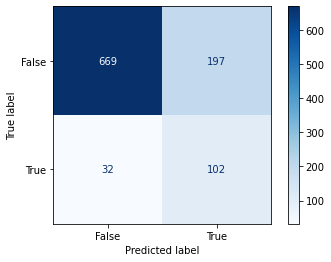

In [26]:
# Taken from lecture 9
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(
    grid_search,
    X_test,
    y_test,
    display_labels=["False", "True"],
    values_format="d",
    cmap=plt.cm.Blues,
);

In [27]:
# Taken from lecture 9
from sklearn.metrics import classification_report

print(
    classification_report(
        y_test, grid_search.predict(X_test), target_names=["False", "True"]
    )
)

              precision    recall  f1-score   support

       False       0.95      0.77      0.85       866
        True       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



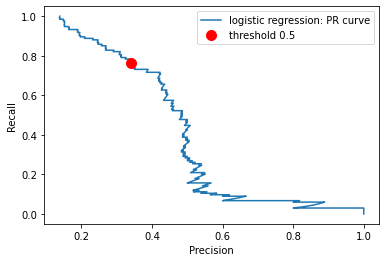

In [28]:
# Taken from Lecture 9
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, grid_search.predict(X_test)),
    recall_score(y_test, grid_search.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");
plt.show()

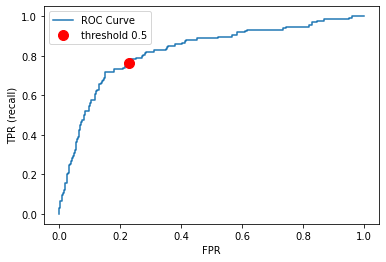

In [29]:
# Taken from lecture 9
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

The Confusion Matrix is summarized by the Classification Report, but it does give us the raw count of how many examples are TP, TN, FP, FN. In this case, due to balancing, class-imbalance has been dealt with as each category has a relevant value.

Classification Report shows that weighted average is better performing for precision, recall, and f1-score than macro average.

PR Curve illiustrates that our predict_proba with a threshold of 0.5 has a high recall score of nearly 77% but relatively low precision score of about 34%.

ROC curve shows for the threshold = 0.5: the recall is 77% while the false positive rate is about 25%.


<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [30]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [31]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)

In [32]:
print(train_df.info())
print(train_df.describe())
print(train_df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9950 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.870716     28.570918      5.422508      1.096515   1434.115734   
std        1.900132     12.582281      2.520931      0.491311   1130.309986   
min        0.499900      1.000000      0.846154      0.333333     

In [33]:
#didnt include target MedHouseVal

numeric_features = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
]
    
    
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features)
)

# preprocessor.fit(X_train)
# preprocessor.transform(X_train)
# preprocessor.transform(X_test)

X_train = train_df.drop(columns=["MedHouseVal"])
X_test = test_df.drop(columns=["MedHouseVal"])

y_train = train_df["MedHouseVal"]
y_test = test_df["MedHouseVal"]

Yes, need to scale all numeric columns (except target) since ranges differ a lot (ex. max population is 28566 while max MedInc is 15).

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [34]:
dummy = DummyRegressor()
pipe = make_pipeline(preprocessor, dummy)
pd.DataFrame(cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.005601,0.002472,-0.000023,0.0
1,0.003263,0.001232,-0.000576,0.0
2,0.002672,0.001155,-0.000061,0.0
3,0.003436,0.001324,-0.000015,0.0
4,0.003026,0.001163,-0.000058,0.0


R^2 is used for scoring regression problems.

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [35]:
# Taken from HW3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [36]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [37]:
results_dict = {}

for modelName, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results_dict[modelName] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True, scoring=score_types_reg)
        # results_dict[modelName] = cross_validate(pipe, X_train, y_train, cv=5, return_train_score=True, scoring=score_types_reg)

    
pd.DataFrame(results_dict).T



,fit_time,score_time,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_r2,train_r2,test_mape_scorer,train_mape_scorer
Ridge,0.004 (+/- 0.001),0.003 (+/- 0.001),-0.683 (+/- 0.341),-0.524 (+/- 0.003),-0.810 (+/- 0.183),-0.724 (+/- 0.002),-0.535 (+/- 0.004),-0.531 (+/- 0.002),0.482 (+/- 0.276),0.606 (+/- 0.004),-31.980 (+/- 0.567),-31.763 (+/- 0.193)
Random Forest,5.780 (+/- 0.056),0.065 (+/- 0.004),-0.263 (+/- 0.013),-0.037 (+/- 0.001),-0.513 (+/- 0.012),-0.192 (+/- 0.002),-0.335 (+/- 0.006),-0.125 (+/- 0.002),0.802 (+/- 0.013),0.972 (+/- 0.001),-18.860 (+/- 0.778),-7.045 (+/- 0.092)


The validaton errors are most minimal in each category (therefore score is maximized) in Random Forest. Interestingly, the R^2 score for Ridge is only 0.140. This means it is barely better than a DummyRegressor with a baseline score of 0. Both Ridge and RandomForest perform better than DummyRegressor().

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [38]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [39]:
rfr = RandomForestRegressor()
pipe_best = make_pipeline(preprocessor, rfr)

pipe_best.fit(X_train, y_train)

pipe_best.score(X_test, y_test)

0.8124262478750623

The test r^2 score is about 1% better than the validation score (81% compared to 80%). This is unexpected as the test score is usually lower than the validation and training scores. But in this case, it is higher even though it is unseen data, which is likely due to luck of dataset distribution.

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [40]:
ridge = Ridge()
pipe_ridge = make_pipeline(preprocessor, ridge)

pipe_ridge.fit(X_train, y_train)


ridge_data = pd.DataFrame(
    data={
        "features": numeric_features,
        "coefficients": pipe_ridge.named_steps["ridge"].coef_,
    }
)

In [41]:
ridge_data.sort_values("coefficients",ascending=False)
print(ridge_data)

     features  coefficients
0      MedInc      0.835964
1    HouseAge      0.115302
2    AveRooms     -0.281707
3   AveBedrms      0.318049
4  Population     -0.007375
5    AveOccup     -0.041683
6    Latitude     -0.889398
7   Longitude     -0.854789


Increasing the features: MedInc, HouseAge, AveBedrms would increase the housing price.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 